***Support Vector Machines***
    Using SVM with Python to predict whether a breast cancer tumor is malignant or benign. Exercise uses numpy, pandas, and scikitlearn and utilizes train test split, SVM, SVC,  and GridSearch to identify the best parameters for prediction.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [6]:
# 1 point

# import and load the breast cancer dataset 

# output a variable where the data is loaded straight from sklearn

cancer =datasets.load_breast_cancer()
cancer.data.shape

# YOUR CODE HERE




(569, 30)

In [ ]:
assert cancer.data.shape == (569,30)

In [7]:
print(cancer['DESCR'])

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [13]:
cancer['feature_names']
cancer['target_names']

array(['malignant', 'benign'], dtype='<U9')

In [16]:
# 1 point

#load the data from the dataset into a pd df

#output a dataframe with the data of the dataset and the column names as feature names
#IT SHOULD NOT INCLUDE THE TARGET 

df_feat = pd.DataFrame(cancer.data, columns=cancer['feature_names'])
df_feat

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:

for i in cancer['feature_names']:
    if df_feat[i].shape != (569,):
        print(i)
        break
    else:
        print(i,'Sucessful')


In [25]:
# 1 point

# create a dataframe with all the targets and the column name your be 'Cancer'
# output a single column dataframe
df_target = pd.DataFrame(cancer.target, columns=['cancer'])
df_target
df_target.shape


(569, 1)

In [ ]:
assert df_target['Cancer'].shape == (569,)

In [31]:
X = df_feat.to_numpy()
y = df_target.to_numpy()
print(type(X), type(y))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [46]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

In [38]:
#1 point
# get the train test split, tested with random state 0 and test_size 0.2
# import if needed
# all the subsets should be numpy arrays
# TIP carefull with the shape of the Y
# YOUR CODE HERE
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)
y_train = y_train.ravel()
y_test = y_test.ravel()

In [39]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(455, 30) (114, 30)
(455,) (114,)


In [ ]:
# assert x_train.shape == (455,30)
# assert x_test.shape == (114,30)
# assert y_train.shape == (455,)
# assert y_test.shape == (114,)

In [45]:
# 2 points
#Train the support vector classifier
# import if needed

clf = svm.SVC(kernel="rbf")
clf.fit(X_train, y_train)
clf.support_vectors_.shape


(123, 30)

In [ ]:
assert clf.support_vectors_.shape == (123,30)

In [49]:
# 3 points
# predict the testing data and get the accuracy
# import if needed
# output preds is the array with the predictions and acc is a float between 0 and 1
# YOUR CODE HERE
y_pred = clf.predict(X_test)
print(y_pred.shape)
ac_score = accuracy_score(y_test, y_pred)
print(ac_score)




(114,)
0.9298245614035088


In [ ]:
# assert acc > 0.85
# assert preds.shape == (114,)

***Everything is being classified into a single class! Use Grid Search to search for the best parameters! (Scikitlearn GridSearchCV)***


In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import plot_confusion_matrix

In [61]:
# 2 points
#Set parameters
# the parameters should be in a dict format
# YOUR CODE HERE
# params = {'C':[0.1,0.5,1,5,10], 'kernel':['rbf','poly']}
# print(len(params),'&',len(params['kernel']))

In [62]:
# assert len(params) == 2
# assert len(params['kernel']) == 2

In [63]:
#Fit grid (Note to self: first it runs the same loop with cross-validation to find the best parameter combination.
#  Once it has the best combination, it runs fit again on all data passed to fit (without cross-validation), 
# to built a single new model using the best parameter setting.)
# 4 points
# add an svm to the grid and train it
# the SVM should be an untrained one
# import if needed 
# svc = 0
# grid_clf = 0
# YOUR CODE HERE
# cv_model = svm.SVC()
# clf = GridSearchCV(cv_model, params)
# clf.fit(X_train, y_train)
# GridSearchCV(estimator=svm.SVC(), param_grid={'C':[1,10], 'kernel':['rbf','poly']})
# sorted(clf.cv_results_.keys())



In [ ]:
# dic = grid_clf.get_params(deep=False)
# assert type(dic['estimator']) == type(svm.SVC()) 
# assert dic['pre_dispatch'] == '2*n_jobs'

In [64]:
# 2 point
#Get in a list the best parameters of the grid
#output python list with the best parameters sorted
# YOUR CODE HERE
# best_params = clf.best_params_
# best_params



In [65]:
# assert best_params[0] == 'mean_fit_time','mean_score_time','mean_test_score','param_C'
# assert best_params[1] == 'mean_score_time'
# assert best_params[2] == 'mean_test_score'
# assert best_params[3] == 'param_C'

In [66]:
clf = GridSearchCV(svm.SVC(), {
    'C':[1,10,20],
    'kernel':['rbf','poly']
}, cv=5, return_train_score=False)
clf.fit(X_train, y_train)
clf.cv_results_


{'mean_fit_time': array([0.00318785, 0.00179477, 0.00319362, 0.00259023, 0.00279274,
        0.00319252]),
 'std_fit_time': array([0.00099159, 0.00039861, 0.00039997, 0.00049003, 0.00039942,
        0.00074442]),
 'mean_score_time': array([0.00080161, 0.00079789, 0.00079479, 0.00059838, 0.00059857,
        0.0005971 ]),
 'std_score_time': array([0.0004009 , 0.00039895, 0.00039741, 0.00048858, 0.00048873,
        0.00048753]),
 'param_C': masked_array(data=[1, 1, 10, 10, 20, 20],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_kernel': masked_array(data=['rbf', 'poly', 'rbf', 'poly', 'rbf', 'poly'],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'C': 1, 'kernel': 'rbf'},
  {'C': 1, 'kernel': 'poly'},
  {'C': 10, 'kernel': 'rbf'},
  {'C': 10, 'kernel': 'poly'},
  {'C': 20, 'kernel': 'rbf'},
  {'C': 20, 'kernel': 'poly'}],
 'split0_tes

In [67]:
df = pd.DataFrame(clf.cv_results_)
df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.003188,0.000992,0.000802,0.000401,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.923077,0.879121,0.901099,0.901099,0.923077,0.905495,0.016447,5
1,0.001795,0.000399,0.000798,0.000399,1,poly,"{'C': 1, 'kernel': 'poly'}",0.923077,0.879121,0.901099,0.890110,0.923077,0.903297,0.017582,6
2,0.003194,0.000400,0.000795,0.000397,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.956044,0.879121,0.901099,0.923077,0.912088,0.914286,0.025441,2
3,0.002590,0.000490,0.000598,0.000489,10,poly,"{'C': 10, 'kernel': 'poly'}",0.956044,0.890110,0.901099,0.912088,0.901099,0.912088,0.023051,4
4,0.002793,0.000399,0.000599,0.000489,20,rbf,"{'C': 20, 'kernel': 'rbf'}",0.945055,0.890110,0.923077,0.934066,0.923077,0.923077,0.018388,1
5,0.003193,0.000744,0.000597,0.000488,20,poly,"{'C': 20, 'kernel': 'poly'}",0.956044,0.879121,0.901099,0.923077,0.901099,0.912088,0.026005,3


In [72]:
df2=df[['mean_fit_time','mean_score_time','mean_test_score','param_C', 'param_kernel']]
df2

,mean_fit_time,mean_score_time,mean_test_score,param_C,param_kernel
0,0.003188,0.000802,0.905495,1,rbf
1,0.001795,0.000798,0.903297,1,poly
2,0.003194,0.000795,0.914286,10,rbf
3,0.002590,0.000598,0.912088,10,poly
4,0.002793,0.000599,0.923077,20,rbf
5,0.003193,0.000597,0.912088,20,poly


In [81]:
df3 = df2.sort_values(by=['mean_test_score'],ascending=False)
best_params= df3.loc[4].to_numpy()
best_params

array([0.0027927398681640626, 0.0005985736846923828, 0.9230769230769231,
       20, 'rbf'], dtype=object)

In [70]:
clf.best_score_

0.9230769230769231

In [71]:
clf.best_params_

{'C': 20, 'kernel': 'rbf'}

In [82]:
# 5 points
# predict the testing set and get the accuracy
# accuracy as always will be between 0 and 1
# YOUR CODE HERE
best_model = svm.SVC(kernel='rbf',C=20)
best_model.fit(X_train, y_train)


SVC(C=20)

In [88]:
best_pred = best_model.predict(X_test)
acc_best = accuracy_score(y_test, best_pred)
print(acc_best, best_pred.shape)

0.9473684210526315 (114,)


In [ ]:

assert acc > 0.92
assert preds[preds.argmax()] == 1
assert preds.shape == (114,)

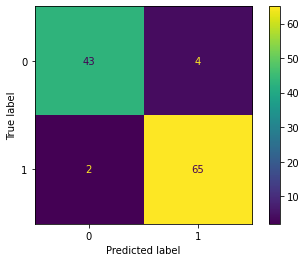

In [89]:
# 3 points
# get the confusion matrix
#import if needed


# YOUR CODE HERE
plot_confusion_matrix(best_model, X_test,y_test)




In [ ]:
assert conf_mat.shape == (2,2)
assert conf_mat[0][1] < 7
assert conf_mat[1][0] < 3


# Discussion of results

Accuracy score before GridsearchCV `0.92`  
Accuracy score after GridsearchCV `0.94`